In [2]:
import pandas as pd

ames_housing = pd.read_csv("ames_housing_no_missing.csv")
features_of_interest = [
    "LotFrontage",
    "LotArea",
    "PoolArea",
    "YearBuilt",
    
]

target_name = "SalePrice"
data, target = (
    ames_housing[features_of_interest],
    ames_housing[target_name],
)

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), LinearRegression()
).set_output(transform="pandas")
cv_results = cross_validate(
    linear_regression,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True
)

In [4]:
train_error = -cv_results["train_score"]
print(f"MSE on training set: {train_error.mean()} +- {train_error.std()}")
test_error = -cv_results["test_score"]
print(f"MSE on test set: {test_error.mean()} +- {test_error.std()}")

MSE on training set: 2881906420.4621425 +- 89944892.22583312
MSE on training set: 92844639592.07141 +- 264970817529.02878


In [5]:
model_first_fold = cv_results["estimator"][0]
model_first_fold

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [6]:
feature_names = model_first_fold[-1].feature_names_in_
feature_names

array(['LotFrontage', 'LotArea', 'PoolArea', 'YearBuilt', 'LotFrontage^2',
       'LotFrontage LotArea', 'LotFrontage PoolArea',
       'LotFrontage YearBuilt', 'LotArea^2', 'LotArea PoolArea',
       'LotArea YearBuilt', 'PoolArea^2', 'PoolArea YearBuilt',
       'YearBuilt^2'], dtype=object)

In [7]:
import pandas as pd

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

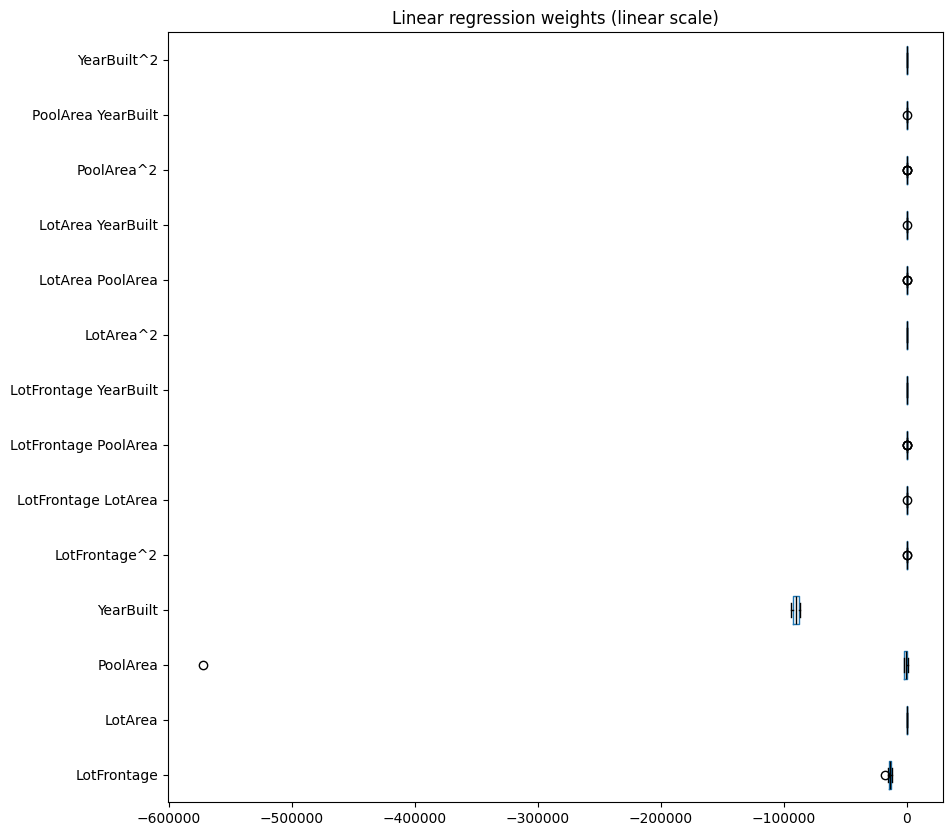

In [8]:
import matplotlib.pyplot as plt

color = {"whiskers":"black", "medians":"black", "caps":"black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Linear regression weights (linear scale)")

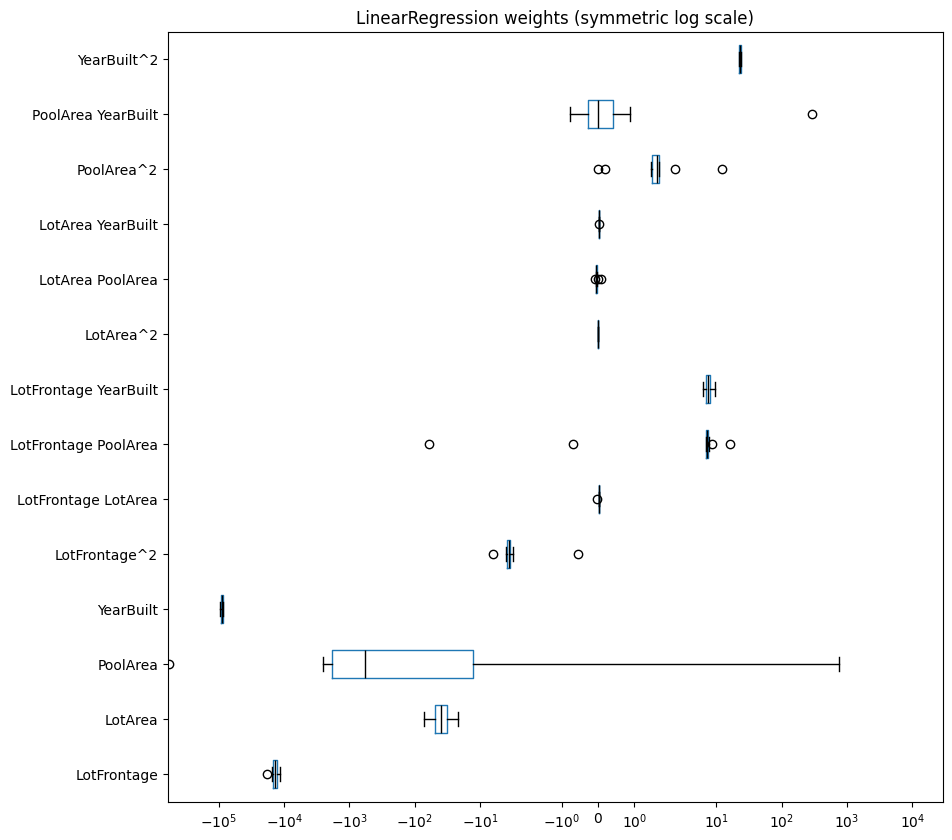

In [9]:
colors = {"whiskers": "black", "medians":"black", "caps":"black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_linear_regression.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(
    title="LinearRegression weights (symmetric log scale)",
    xscale="symlog"
)

In [26]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=100, solver='cholesky')
)
cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=20,
    scoring = "neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

c:\env\py310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.3303e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\env\py310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.29003e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\env\py310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.63141e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\env\py310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.11015e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\env\py310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.78483e-19):

In [27]:
train_error = -cv_results["train_score"]
print(f"MSE on training set: {train_error.mean():.2e} +- {train_error.std():.2e}")
test_error = -cv_results["test_score"]
print(f"MSE on training set: {test_error.mean():.2e} +- {test_error.std():.2e}")

MSE on training set: 3.05e+09 +- 5.87e+07
MSE on training set: 5.92e+09 +- 6.42e+09


In [28]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

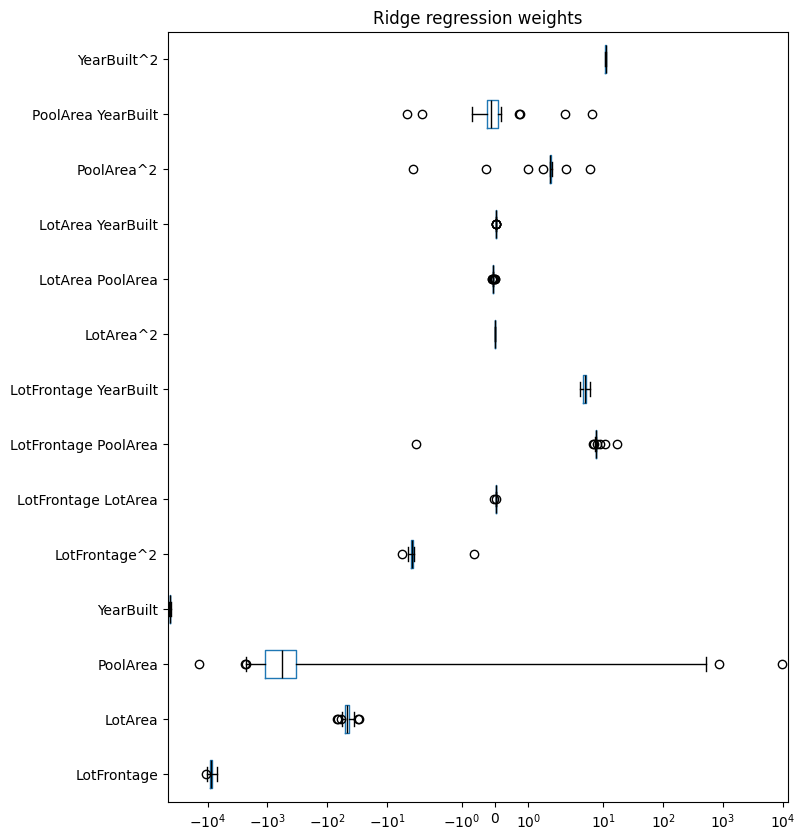

In [29]:
fig, ax = plt.subplots(figsize=(8, 10))
weights_ridge.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression weights", xscale="symlog")

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaled_ridge = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=10, solver="cholesky")
)

cv_results = cross_validate(
    scaled_ridge,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True
)

In [31]:
train_error = -cv_results["train_score"]
print(f"MSE on training set: {train_error.mean():.2e} +- {train_error.std():.2e}")
test_error = -cv_results["test_score"]
print(f"MSE on training set: {test_error.mean():.2e} +- {test_error.std():.2e}")

MSE on training set: 3.80e+09 +- 1.21e+08
MSE on training set: 3.83e+09 +- 1.17e+09


In [36]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled = pd.DataFrame(coefs, columns=feature_names)

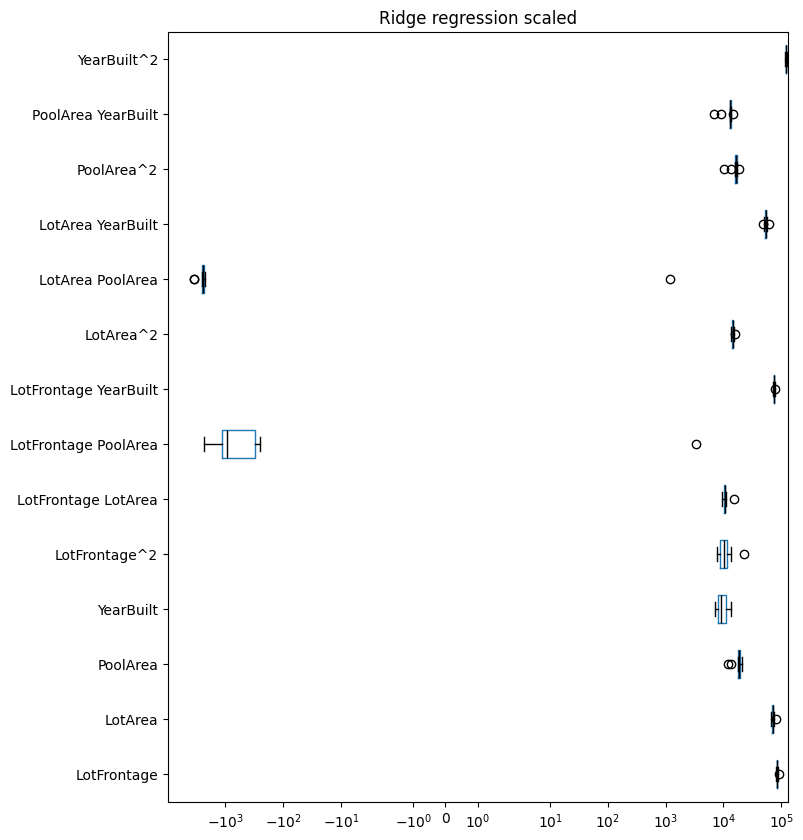

In [37]:
fix, ax = plt.subplots(figsize=(8, 10))
weights_ridge_scaled.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(title="Ridge regression scaled", xscale="symlog")

In [39]:
ridge_large_alpha = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1_000_000, solver="lsqr")
)

cv_results = cross_validate(
    ridge_large_alpha,
    data,
    target,
    cv=10, scoring = "neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True
)

In [40]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_large_alpha = pd.DataFrame(coefs, columns=feature_names)

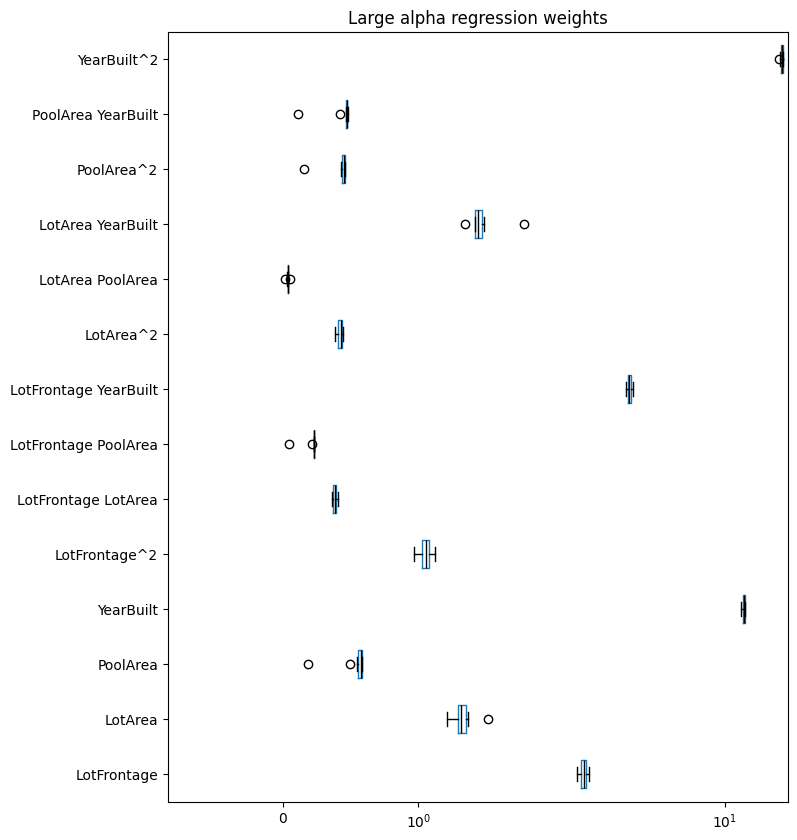

In [41]:
fig, ax = plt.subplots(figsize = (8, 10))
weights_ridge_large_alpha.plot.box(color=color, vert=False, ax=ax)
_=ax.set(title="Large alpha regression weights", xscale="symlog")

In [42]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-7, 5, num=100)
ridge = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeCV(alphas=alphas, store_cv_values=True)
)

In [46]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=50, random_state=0)
cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=cv,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2
)

In [47]:
train_error = -cv_results["train_score"]
print(f"MSE on training set: {train_error.mean():.2e} +- {train_error.std():.2e}")
test_error = -cv_results["test_score"]
print(f"MSE on training set: {test_error.mean():.2e} +- {test_error.std():.2e}")

MSE on training set: 3.14e+09 +- 1.42e+08
MSE on training set: 5.12e+09 +- 6.43e+09


In [53]:
mse_alphas = [
    est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]
]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
print(cv_alphas.head())
cv_alphas = cv_alphas.aggregate(["mean", "std"]).T
cv_alphas

   1.000000e-07  1.321941e-07  1.747528e-07  2.310130e-07  3.053856e-07  \
0  4.016780e+10  3.550002e+10  3.059068e+10  2.567538e+10  2.101378e+10   
1  9.670561e+10  9.661699e+10  9.650006e+10  9.634586e+10  9.614267e+10   
2  3.916433e+09  3.916297e+09  3.916117e+09  3.915879e+09  3.915565e+09   
3  1.040709e+11  1.039780e+11  1.038554e+11  1.036938e+11  1.034808e+11   
4  5.518594e+09  5.417381e+09  5.291466e+09  5.137624e+09  4.953918e+09   

   4.037017e-07  5.336699e-07  7.054802e-07  9.326033e-07  1.232847e-06  ...  \
0  1.684067e+10  1.331979e+10  1.051865e+10  8.411911e+09  6.907682e+09  ...   
1  9.587519e+10  9.552356e+10  9.506212e+10  9.445800e+10  9.366949e+10  ...   
2  3.915151e+09  3.914604e+09  3.913883e+09  3.912934e+09  3.911685e+09  ...   
3  1.032004e+11  1.028317e+11  1.023478e+11  1.017140e+11  1.008866e+11  ...   
4  4.740762e+09  4.502075e+09  4.246148e+09  3.985672e+09  3.736451e+09  ...   

   8.111308e+03  1.072267e+04  1.417474e+04  1.873817e+04  2.477076e

c:\env\py310\lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


,mean,std
1.000000e-07,7.385015e+10,5.639099e+10
1.321941e-07,7.349214e+10,5.630136e+10
1.747528e-07,7.307487e+10,5.617006e+10
2.310130e-07,7.259439e+10,5.597364e+10
3.053856e-07,7.204449e+10,5.568121e+10
...,...,...
3.274549e+04,6.320166e+09,1.337543e+08
4.328761e+04,6.325361e+09,1.338294e+08
5.722368e+04,6.329303e+09,1.338864e+08
7.564633e+04,6.332293e+09,1.339297e+08


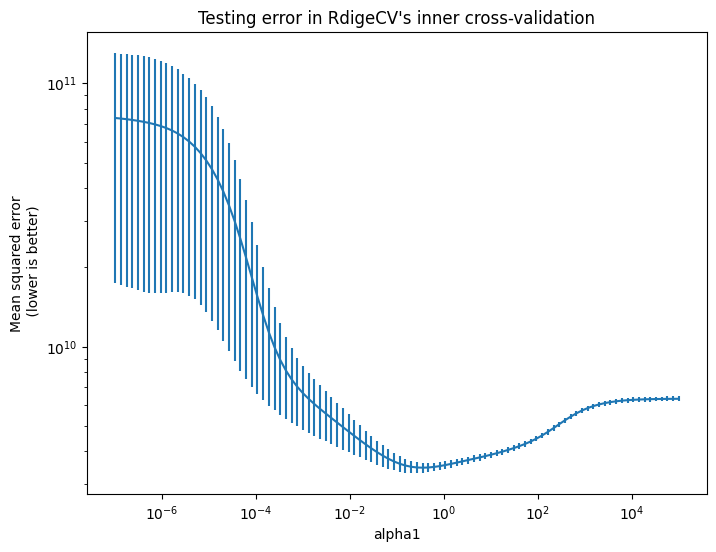

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(cv_alphas.index, cv_alphas["mean"], yerr=cv_alphas["std"])
_ = ax.set(
    xscale = "log",
    xlabel="alpha1",
    yscale="log",
    ylabel = "Mean squared error\n (lower is better)",
    title="Testing error in RdigeCV's inner cross-validation"
)

In [57]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
len(best_alphas)

50

In [58]:
print(
    f"Min optimal alpha: {np.min(best_alphas):.2f} and "
    f"Max optimal alpha: {np.max(best_alphas):.2f}"
)

Min optimal alpha: 0.00 and Max optimal alpha: 0.46
